In [73]:
import torch

In [74]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your
   [0.55, 0.87, 0.66], # journey
   [0.57, 0.85, 0.64], # starts 
   [0.22, 0.58, 0.33], # with    
   [0.77, 0.25, 0.10], # one     
   [0.05, 0.80, 0.55]] # step    
)

In [75]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i,query)
attn_scores_2

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [76]:
 attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
 print("Attention weights:", attn_weights_2_tmp)
 print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [77]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum()
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [78]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [79]:
query = inputs[1]        
print(inputs)
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    print(attn_weights_2[i])
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
tensor(0.1385)
tensor(0.2379)
tensor(0.2333)
tensor(0.1240)
tensor(0.1082)
tensor(0.1581)
tensor([0.4419, 0.6515, 0.5683])


In [80]:
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [81]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [82]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights[0].sum())

tensor(1.0000)


In [83]:
print(inputs)
print(attn_weights)
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [84]:
x_2 = inputs[1]    
print(x_2)
d_in = inputs.shape[1]     
print(d_in)
d_out = 2

tensor([0.5500, 0.8700, 0.6600])
3


In [85]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [86]:
query_2 = x_2 @ W_query 
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value
print(query_2)
key_2

tensor([0.4306, 1.4551])


tensor([0.4433, 1.1419])

In [87]:
keys = inputs @ W_key 
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [88]:
keys_2 = keys[1]            
print(keys_2)
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor([0.4433, 1.1419])
tensor(1.8524)


In [89]:
attn_scores_2 = query_2 @ keys.T      
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [90]:
print(query_2)
print(keys)

tensor([0.4306, 1.4551])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])


In [91]:
d_k = keys.shape[-1]
print(d_k)
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

2
tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [92]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


In [93]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))
    def forward(self,x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax( attn_scores / (keys.shape[-1]) ** 0.5 , dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [94]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [95]:
import torch.nn as nn
class SelfAttention_v2(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)
    def forward(self,x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax( attn_scores / (keys.shape[-1]) ** 0.5 , dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [96]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [97]:
list(sa_v2.parameters())

[Parameter containing:
 tensor([[ 0.3161,  0.4568,  0.5118],
         [-0.1683, -0.3379, -0.0918]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4058, -0.4704,  0.2368],
         [ 0.2134, -0.2601, -0.5105]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2526, -0.1415, -0.1962],
         [ 0.5191, -0.0852, -0.2043]], requires_grad=True)]

In [98]:
queries = sa_v2.W_query(inputs)    
keys = sa_v2.W_key(inputs) 
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [99]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [100]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [101]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [102]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [103]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)   
example = torch.ones(6, 6)     
print(dropout(example))
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])
tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [104]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [105]:
class CausalAttention(nn.Module):

    def __init__(self,d_in,d_out,context_length,dropout,qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length,context_length),diagonal=1)
        )

    def forward(self,x):
        b,num_tokens,d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        # print(keys.shape)
        attn_scores = queries @ keys.transpose(1,2) # We only transpose the dimensions 1 and 2 keeping the batch dimensions same (0)
        # print(attn_scores)
        # print(self.mask.bool()[:num_tokens,:num_tokens])
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens,:num_tokens], -torch.inf
        )
        attn_weights = torch.softmax( attn_scores / (keys.shape[-1]) ** 0.5 , dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [106]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [122]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)]
        )
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [123]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
print(batch)

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


In [124]:
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
 )
context_vecs = mha(batch)

In [125]:
 print(context_vecs)
 print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### CODING GPT ARCHITECTURE

In [40]:
import torch
import torch.nn as nn
GPT_CONFIG_124M = {
    "vocab_size" : 50257,
    "context_length" : 1024,
    "emb_dim" : 768,
    "n_heads" : 12,
    "n_layers" : 12,
    "drop_rate" : 0.1,
    "qkv_bias" : False
}

In [44]:
class DummyGPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"],cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[
                DummyTransformerBlock(cfg)
                for _ in range(cfg["n_layers"])
            ]
        )
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"],bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):   
    def __init__(self, cfg):
        super().__init__()
    def forward(self, x):    
        return x

class DummyLayerNorm(nn.Module):          
    def __init__(self, normalized_shape, eps=1e-5):   
        super().__init__()
        self.eps = 1e-5 #The variable eps is a small constant (epsilon) added to the variance to prevent division by zero during normalization.
    def forward(self, x):
         return x

In [45]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch,dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [46]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output Shape :", logits.shape)
print(logits)

Output Shape : torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


In [47]:
torch.manual_seed(123)
batch_example = torch.randn(2,5) # randn implements the random values based on gausian dist - mean = 0 and variance = 1
layer = nn.Sequential(nn.Linear(5,6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [48]:
mean = out.mean(dim=-1, keepdim=True)
mean.shape, out.shape # Keepdim maintains the ndim of the mean created

(torch.Size([2, 1]), torch.Size([2, 6]))

In [49]:
var = out.var(dim=-1, keepdim=True)
var

tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)

In [50]:
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [51]:
 out_norm = (out - mean) / torch.sqrt(var)

In [52]:
 mean = out_norm.mean(dim=-1, keepdim=True)
 var = out_norm.var(dim=-1, keepdim=True)
 print("Normalized layer outputs:\n", out_norm)
 print("Mean:\n", mean)
 print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [53]:
class LayerNorm(nn.Module):          
    def __init__(self,emb_dim):   
        super().__init__()
        self.eps = 1e-5 #The variable eps is a small constant (epsilon) added to the variance to prevent division by zero during normalization.
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
         mean = x.mean(dim=-1, keepdim=True)
         var = x.var(dim=-1, keepdim=True, unbiased=False)
         norm_x = (x - mean) / torch.sqrt(var + self.eps)
         return self.scale * norm_x + self.shift

In [54]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[-2.9802e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [55]:
import torch
import torch.nn as nn

# Define a tensor (batch_size=4, features=5)
x = torch.randn(4, 5)

# Layer Normalization
layer_norm = nn.LayerNorm(5)  # Normalize across the 5 features
output = layer_norm(x)

print("Input:\n", x)
print("Output (LayerNorm applied):\n", output)


Input:
 tensor([[-0.2044, -2.2685, -0.9133, -0.4204,  0.2436],
        [-0.0567,  0.3784,  1.6863,  0.2553, -0.5496],
        [ 1.0042,  0.8272,  1.5434,  0.1406,  1.0617],
        [-0.9929, -1.6025, -1.0764,  0.9031, -0.7218]])
Output (LayerNorm applied):
 tensor([[ 0.5892, -1.8040, -0.2327,  0.3389,  1.1087],
        [-0.5367,  0.0479,  1.8051, -0.1175, -1.1989],
        [ 0.1955, -0.1941,  1.3823, -1.7057,  0.3221],
        [-0.3468, -1.0640, -0.4450,  1.8838, -0.0279]],
       grad_fn=<NativeLayerNormBackward0>)


## Activation Functions
* GELU (Gaussian error linear unit)
* SwiGLU (Swish-gated linear unit)

In [56]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x):
        return x * (0.5) * ( 1 + torch.tanh(1 + torch.sqrt(torch.tensor(2.0 / torch.pi)) * (x + 0.44715 * torch.pow(x,3))))

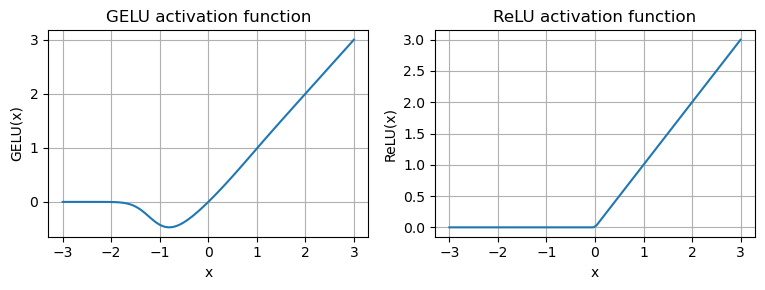

In [57]:
import matplotlib.pyplot as plt
gelu, relu = GELU(), nn.ReLU()
x = torch.linspace(-3, 3, 100)    
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
class FeedForward(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4*cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self,x):
        return self.layers(x)

In [59]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)         
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [121]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [137]:
class MultiHeadAttention(nn.Module):

    def __init__(self,d_in,d_out,context_length,dropout, num_heads, qkv_bias= False):
        super().__init__()
        assert(d_out % num_heads == 0)
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in,d_out,bias = qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias = qkv_bias)
        self.W_value = nn.Linear(d_in,d_out, bias = qkv_bias)
        self.out_proj = nn.Linear(d_out,d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length,context_length),diagonal=1)
        )
    def forward(self,x):
        b, num_tokens, d_in = x.shape
        
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        keys = keys.view(b,num_tokens,self.num_heads, self.head_dim)
        values = values.view(b,num_tokens,self.num_heads, self.head_dim)
        queries = queries.view(b,num_tokens,self.num_heads, self.head_dim)
        
        keys = keys.transpose(1,2)
        values = values.transpose(1,2)
        queries = queries.transpose(1,2)
        
        attn_scores = queries @ keys.transpose(2,3)
        
        mask_bool = self.mask.bool()[:num_tokens,:num_tokens]

        attn_scores.masked_fill_(mask_bool, - torch.inf)
        
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1] ** 0.5, dim = -1
        )
        
        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values)

        context_vec = context_vec.contiguous().view(
            b, num_tokens, self.d_out
        )

        context_vec = self.out_proj(context_vec)
        return context_vec

In [138]:
 a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],   
            [0.8993, 0.0390, 0.9268, 0.7388],
            [0.7179, 0.7058, 0.9156, 0.4340]],
           [[0.0772, 0.3565, 0.1479, 0.5331],
            [0.4066, 0.2318, 0.4545, 0.9737],
            [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [139]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
print(batch_size,context_length, d_in)
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

2 6 3
tensor([[[0.1351, 0.3790],
         [0.1696, 0.2920],
         [0.1652, 0.3355],
         [0.1592, 0.7950],
         [0.1841, 0.6428],
         [0.1850, 0.6201]],

        [[0.1351, 0.3790],
         [0.1696, 0.2920],
         [0.1652, 0.3355],
         [0.1592, 0.7950],
         [0.1841, 0.6428],
         [0.1850, 0.6201]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [140]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [145]:
class TransformerBlock(nn.Module):

    def __init__(self,cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out = cfg["emb_dim"],
            context_length = cfg["context_length"],
            num_heads = cfg["n_heads"],
            dropout = cfg["drop_rate"],
            qkv_bias = cfg["qkv_bias"]
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self,x):

        shortcut = x;
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        return x

In [146]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)                  
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])
